# pyISC Example: Simple Anomaly Detection with Frequency Data
This is a simple example on how to use the pyISC anomaly detector for computing the anomaly scores of Poisson distributed data.

In [9]:
import pyisc;
import numpy as np
from scipy.stats import poisson
%matplotlib inline
from pylab import hist, plot, figure

## Data Creation
Create two arrays with normal and anomalous frequency data respectively.</b>

In [10]:
po_normal = poisson(10)
po_anomaly = poisson(25)

freq_normal = po_normal.rvs(10000)
freq_anomaly = po_anomaly.rvs(15)

Create an 2D array with two columns that combines random frequency and time period equal to 1.

In [11]:
data = np.column_stack([
        list(freq_normal)+list(freq_anomaly), 
        [1.0]*(len(freq_normal)+len(freq_anomaly))
    ])
data[:5]

array([[ 12.,   1.],
       [  7.,   1.],
       [ 16.,   1.],
       [  9.,   1.],
       [ 17.,   1.]])

If we plot the histogram from the frequency data, we can see that the distribution tail is thicker at the right side because of the anomalous data points:

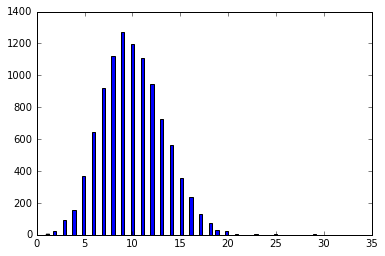

In [12]:
hist(data.T[0],100);

## Used Anomaly Detector
Create an anomaly detector using as first argument the P_PoissonOneside statistical model, that is, we use a Poisson distribution for modelling data, but we only care of anomalous large frequencies. The second argument is an array containg the column index used as input to the statsitical model where 0 is the column index of frequencies and 1 is the column index of the period in the data object:

In [13]:
anomaly_detector = pyisc.AnomalyDetector(
    pyisc.P_PoissonOnesided(frequency_column=0,period_column=1)
)

Train the anomaly detector:

In [14]:
%timeit anomaly_detector.fit(data);

1000 loops, best of 3: 1.54 ms per loop


Compute the anomaly scores for each data point:

In [17]:
scores = anomaly_detector.anomaly_score(data)

## Anomaly Scores
Now we can print some example of normal frequencies vs. anomaly scores:

In [18]:
for s in zip(freq_normal[:15], scores[:15]):
    print s

(12, 1.1745941638946533)
(7, 0.0)
(16, 2.9855577945709229)
(9, 0.0)
(17, 3.570124626159668)
(11, 0.28747570514678955)
(10, 0.0)
(9, 0.0)
(15, 2.4521820545196533)
(11, 0.28747570514678955)
(18, 4.2041616439819336)
(11, 0.28747570514678955)
(8, 0.0)
(9, 0.0)
(13, 1.5453963279724121)


The anomalous frequencies vs. anomaly scores:

In [19]:
for s in zip(freq_anomaly, scores[-15:]):
    print s

(32, 17.405155181884766)
(25, 9.8875513076782227)
(23, 8.0570564270019531)
(25, 9.8875513076782227)
(16, 2.9855577945709229)
(34, 19.836088180541992)
(17, 3.570124626159668)
(23, 8.0570564270019531)
(25, 9.8875513076782227)
(27, 11.866734504699707)
(29, 13.985079765319824)
(35, 21.094324111938477)
(28, 12.909066200256348)
(29, 13.985079765319824)
(29, 13.985079765319824)


As can be seen above, the anomalous frequences also have higher anomaly scores than the normal frequencies as it should be.<br/><br/> This becomes even more visible if we plot the frequency (x-axis) against anomaly scores (y-axis): 

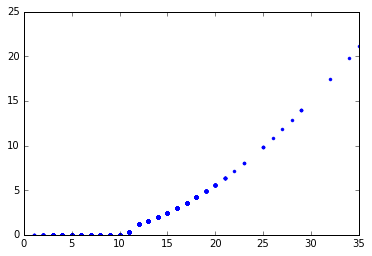

In [20]:
plot(data.T[0], scores, '.');

So, depending on at what level we would consider a frequency an anomaly, we can set a threshold to decide if a frequency is anomalous.

We can also "confuse" the anomaly detector by adding more normal training data closer to the anomalous data:

In [21]:
data2 = np.column_stack([
            poisson(15).rvs(15), 
            [1.0]*15
        ])
anomaly_detector.fit_incrementally(data2);

In [22]:
scores_ = anomaly_detector.anomaly_score(data)

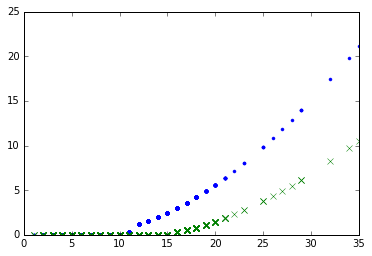

In [23]:
figure(1);plot(data.T[0], scores, 'b.');plot(data.T[0], scores_, 'gx');

Above, if we compare with previous plot, we can see that the updated anomaly scores end at below 12 (green crosses) while in previous plot, the anomaly scores end at below 20 (blue dots). Thus, the anomalous data got less anomalous given the new observed data set (data_object_2).